In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob, os, re
import seaborn as sns

In [27]:
dep_num_file = "/Users/mehdi/Desktop/MyMac/TUD/FASTEN/Repositories/MainRepo/MavenAPIStudy/semver/MavenResultsAnalysis/resources/dependents-count.txt"
selected_vps_file = "/Users/mehdi/Desktop/MyMac/TUD/FASTEN/Repositories/MainRepo/MavenAPIStudy/semver/MavenResultsAnalysis/resources/artifacts.csv"

In [28]:
dep_num = pd.read_csv(dep_num_file)
selected = pd.read_csv(selected_vps_file)

In [29]:
dep_num.head()

,coord,dependents
0,com.guicedee:versioner:1.2.0.3-jre17-rc8,0
1,com.liferay.portal:com.liferay.portal.impl:3.62.0,0
2,com.github.j5ik2o:docker-controller-scala-elas...,0
3,io.github.cdklabs:cdk-tweet-queue:1.0.79,0
4,com.datameshgroup.fusion:fusion-sdk:1.0.1,0


In [30]:
selected.describe()

,coord
count,384
unique,384
top,org.mongodb:bson:4.3.3
freq,1


In [31]:
selected.head()

,coord
0,org.apache.geronimo.javamail:geronimo-javamail...
1,org.apache.calcite:calcite-linq4j:1.28.0
2,com.bbossgroups.security:bboss-security:5.8.2
3,com.helger.peppol:peppol-id-datatypes:8.6.4
4,org.digidoc4j.dss:dss-alert:5.8.d4j.1


In [32]:
type(selected)

TypeError: 'str' object is not callable

In [33]:
r = selected.merge(dep_num, on='coord', how='inner')

In [34]:
selected.merge(dep_num, on='coord', how='inner')

,coord,dependents
0,org.apache.geronimo.javamail:geronimo-javamail...,4
1,org.apache.calcite:calcite-linq4j:1.28.0,4
2,com.bbossgroups.security:bboss-security:5.8.2,4
3,com.helger.peppol:peppol-id-datatypes:8.6.4,4
4,org.digidoc4j.dss:dss-alert:5.8.d4j.1,4
...,...,...
379,org.bouncycastle:bcprov-jdk15on:1.70,228
380,com.fasterxml.jackson.core:jackson-annotations...,228
381,org.projectlombok:lombok:1.18.22,244
382,ch.qos.logback:logback-core:1.2.7,328


In [13]:
len(r[r['dependents']<20])

310

In [36]:
sum(r['dependents'])

7190

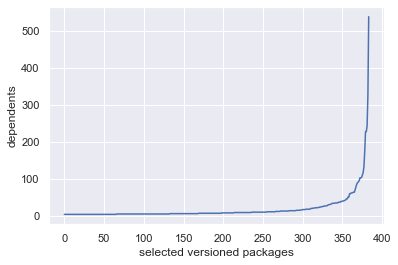

In [49]:
import seaborn as sns
sns.set_theme()
p = sns.lineplot(data=r['dependents'])
p.set_xlabel("selected versioned packages")
p.figure.savefig("selected_vps_dep_count.pdf")

In [38]:
1200/384

3.125

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcecea0b040>]],
      dtype=object)

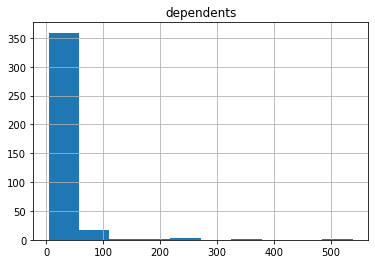

In [13]:
r.hist()

In [14]:
type(r)

pandas.core.frame.DataFrame

In [15]:
print(r)

                                                 coord  dependents
0    org.apache.geronimo.javamail:geronimo-javamail...           4
1             org.apache.calcite:calcite-linq4j:1.28.0           4
2        com.bbossgroups.security:bboss-security:5.8.2           4
3          com.helger.peppol:peppol-id-datatypes:8.6.4           4
4                org.digidoc4j.dss:dss-alert:5.8.d4j.1           4
..                                                 ...         ...
379               org.bouncycastle:bcprov-jdk15on:1.70         228
380  com.fasterxml.jackson.core:jackson-annotations...         228
381                   org.projectlombok:lombok:1.18.22         244
382                  ch.qos.logback:logback-core:1.2.7         328
383                    com.google.code.gson:gson:2.8.9         539

[384 rows x 2 columns]


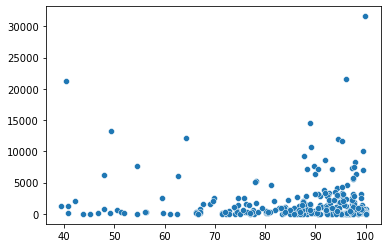

<ipython-input-25-2517a2d87307>:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


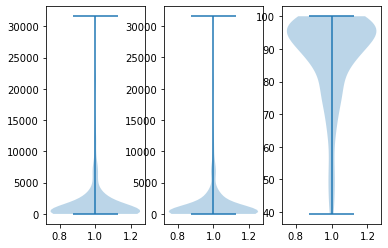

In [25]:
from constants import FIGURE_DIR, OUTPUT_DIR

temp_data = list()
type = 'public-dependent-percentage'
for file in glob.glob(os.path.join(OUTPUT_DIR, '*', f'{type}.bin')):
    temp_data.append([float(x) for x in re.findall(r',(.*)\n', open(file).read())])
lens = list()
zeros = list()
division = list()
for i in temp_data:
    l = len(i)
    zero = i.count(0)
    lens.append(l)
    zeros.append(zero)
    division.append((zero / l)*100)

sns.scatterplot(y=lens, x=division, alpha=1)
plt.show()

fig, (axs1, axs2, axs3) = plt.subplots(1,3)
axs1.violinplot(lens)
axs2.violinplot(zeros)
axs3.violinplot(division)
fig.show()
